<a href="https://colab.research.google.com/github/maksilion/Bridge_Dikaya_data/blob/main/Copy_of_Test_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x # Select module of the tensorflow

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x # Select module of the tensorflow`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [2]:
ls -l #list the number of files 

total 4
drwxr-xr-x 1 root root 4096 Aug 25 13:35 sample_data/


In [3]:
!python -c 'import tensorflow as tf; print(tf.__version__)' # Check the version of the tensorflow

1.15.2


In [4]:
%cd 

/root


In [5]:
!git clone https://github.com/tensorflow/models.git # Import required files from the website

Cloning into 'models'...
remote: Enumerating objects: 60763, done.
remote: Counting objects: 100% (542/542), done.
remote: Compressing objects: 100% (317/317), done.
remote: Total 60763 (delta 313), reused 424 (delta 208), pack-reused 60221
Receiving objects: 100% (60763/60763), 574.04 MiB | 30.52 MiB/s, done.
Resolving deltas: 100% (42205/42205), done.


In [6]:
!pip install tf_slim

     |████████████████████████████████| 352 kB 4.1 MB/s 


In [7]:
%cd /root/models/research/
!protoc object_detection/protos/*.proto --python_out=.
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'
!python object_detection/builders/model_builder_test.py

/root/models/research


In [8]:
!python setup.py build

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [9]:
%cd /root/models/
!git clone https://github.com/maksilion/Bridge_Dikaya_data.git #Import the Totoro files from Aj. Fah

/root/models
Cloning into 'Bridge_Dikaya_data'...
remote: Enumerating objects: 594, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 594 (delta 0), reused 0 (delta 0), pack-reused 573
Receiving objects: 100% (594/594), 53.65 MiB | 34.25 MiB/s, done.
Resolving deltas: 100% (278/278), done.


In [10]:
os.getcwd()

'/root/models'

In [11]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main():
	'''
    for directory in ['train','testing']:
        image_path = os.path.join(os.getcwd(), 'images/{}'.format(directory).format(directory))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv('data/{}_labels.csv'.format(directory), index=None)
        print('Successfully converted xml to csv.')
	''' 
	image_path = os.path.join(os.getcwd(), 'Bridge_Dikaya_data/images/train')
	xml_df = xml_to_csv(image_path)
	xml_df.to_csv('Bridge_Dikaya_data/data/train_labels.csv', index=None)

	image_path = os.path.join(os.getcwd(), 'Bridge_Dikaya_data/images/test')
	xml_df = xml_to_csv(image_path)
	xml_df.to_csv('Bridge_Dikaya_data/data/test_labels.csv',index=None)

main()

In [12]:
%cd /root/models/research/
!protoc object_detection/protos/*.proto --python_out=.
#!export PYTHONPATH=$PYTHONPATH: /usr/local/lib/python3.6/dist-packages/tensorflow/models/research/:/usr/local/lib/python3.6/dist-packages/tensorflow/models/research/slim
#!pwd
#!python /usr/local/lib/python3.6/dist-packages/tensorflow/models/research/object_detection/builders/model_builder_test.py
#!python setup.py build
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'
"""
Usage:
  # From tensorflow/models/
  # Create train data:
  python generate_tfrecord.py --csv_input=data/train_labels.csv  --output_path=train.record

  # Create test data:
  python generate_tfrecord.py --csv_input=data/test_labels.csv  --output_path=test.record
"""
%cd /root/models/Bridge_Dikaya_data/tfrecord
!python generate_tfrecord.py --csv_input=/root/models/Bridge_Dikaya_data/data/train_labels.csv  --output_path=train.record --image_dir=/root/models/Bridge_Dikaya_data/images/train
!python generate_tfrecord.py --csv_input=/root/models/Bridge_Dikaya_data/data/test_labels.csv  --output_path=test.record --image_dir=/root/models/Bridge_Dikaya_data/images/test



/root/models/research
/root/models/Bridge_Dikaya_data/tfrecord


W0827 08:16:56.372040 140046997940096 module_wrapper.py:139] From generate_tfrecord.py:90: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0827 08:16:56.428368 140046997940096 module_wrapper.py:139] From generate_tfrecord.py:49: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /root/models/Bridge_Dikaya_data/tfrecord/train.record


W0827 08:16:58.877322 140629810272128 module_wrapper.py:139] From generate_tfrecord.py:90: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0827 08:16:58.891486 140629810272128 module_wrapper.py:139] From generate_tfrecord.py:49: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /root/models/Bridge_Dikaya_data/tfrecord/test.record


In [13]:
%cd ~/models

import os
import shutil
import glob
import urllib
import tarfile
from requests import get

MODEL = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = 'pretrained_model'

if not (os.path.exists(MODEL_FILE)):
  with open(MODEL_FILE, "wb") as file:
    # get request
    response = get(DOWNLOAD_BASE + MODEL_FILE)
    # write to file
    file.write(response.content)
    #opener = urllib.URLopener()
    #opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
  shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

/root/models


In [14]:
# Move Config file to directory "models"
shutil.move("/root/models/research/object_detection/samples/configs/ssd_mobilenet_v1_coco.config", "/root/models") 

'/root/models/ssd_mobilenet_v1_coco.config'

In [17]:
%cd /root/models/research/
!protoc object_detection/protos/*.proto --python_out=.
#!export PYTHONPATH=$PYTHONPATH: /usr/local/lib/python3.6/dist-packages/tensorflow/models/research/:/usr/local/lib/python3.6/dist-packages/tensorflow/models/research/slim
#!pwd
#!python /usr/local/lib/python3.6/dist-packages/tensorflow/models/research/object_detection/builders/model_builder_test.py
#!python setup.py build
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'

# Edit Pipeline 
import tensorflow as tf
from google.protobuf import text_format
from object_detection.protos import pipeline_pb2

pipeline = pipeline_pb2.TrainEvalPipelineConfig()                                                                                                                                                                                                          
config_path = '/root/models/ssd_mobilenet_v1_coco.config'
with tf.gfile.GFile( config_path, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline)

pipeline.train_input_reader.tf_record_input_reader.input_path[:] = ['/root/models/Bridge_Dikaya_data/tfrecord/train.record'] 
pipeline.train_input_reader.label_map_path = '/root/models/Bridge_Dikaya_data/data/object-detection.pbtxt'
pipeline.eval_input_reader[0].tf_record_input_reader.input_path[:] = ['/root/models/Bridge_Dikaya_data/tfrecord/test.record'] 
pipeline.eval_input_reader[0].label_map_path = '/root/models/Bridge_Dikaya_data/data/object-detection.pbtxt'
pipeline.train_config.fine_tune_checkpoint = '/root/models/pretrained_model/model.ckpt'
pipeline.train_config.num_steps = 50
pipeline.model.ssd.num_classes = 2
pipeline.eval_config.num_examples = 5


config_text = text_format.MessageToString(pipeline)                                                                                                                                                                                                        
with tf.gfile.Open( config_path, "wb") as f:                                                                                                                                                                                                                       
    f.write(config_text)

/root/models/research


In [18]:
# Change into the models directory
%cd /root/models/research/
!protoc object_detection/protos/*.proto --python_out=.
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'

# Begin training
!python /root/models/research/object_detection/legacy/train.py \
    --logtostderr \
    --train_dir=/root/models/trained \
    --pipeline_config_path=/root/models/ssd_mobilenet_v1_coco.config

/root/models/research
Instructions for updating:
Use object_detection/model_main.py.
W0827 08:19:04.481079 140484313290624 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/absl/app.py:251: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.
Instructions for updating:
Please switch to tf.train.create_global_step
W0827 08:19:04.491291 140484313290624 deprecation.py:323] From /root/models/research/object_detection/legacy/trainer.py:265: create_global_step (from tf_slim.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.create_global_step
INFO:tensorflow:Reading unweighted datasets: ['/root/models/Bridge_Dikaya_data/tfrecord/train.record']
I0827 08:19:04.511691 140484313290624 dataset_builder.py:163] Reading unweighted datasets: ['/root/models/Bridge_Dikaya_data/tfrecord/train.record']
INFO:tensorflow:Reading record da

In [20]:
#Export trained model 
%cd /root/models/research
!protoc object_detection/protos/*.proto --python_out=.
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'
!python /root/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=/root/models/ssd_mobilenet_v1_coco.config \
    --output_directory=/root/models/fine_tuned_model \
    --trained_checkpoint_prefix=/root/models/trained/model.ckpt-50

/root/models/research
Instructions for updating:
Please use `layer.__call__` method instead.
W0827 08:21:41.536835 140323849418624 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0827 08:21:43.365495 140323849418624 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0827 08:21:43.412440 140323849418624 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0827 08:21:43.460239 140323849418624 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth o

In [21]:
#Detection
import pathlib
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
# This is needed to display the images.
%matplotlib inline

In [22]:
# What model to download.
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = '/root/models/fine_tuned_model' + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/root/models/Bridge_Dikaya_data/data/object-detection.pbtxt'

NUM_CLASSES = 2


In [23]:
print(PATH_TO_CKPT)

/root/models/fine_tuned_model/frozen_inference_graph.pb


In [24]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')


In [25]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [26]:
print(category_index)

{1: {'id': 1, 'name': 'Bridge_TV_Deluxe'}, 2: {'id': 2, 'name': 'Dikaya_Ohota_HD'}}


In [27]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [28]:
# For the sake of simplicity we will use only 5 images:
# from image1.jpg
# to image5.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/root/models/Bridge_Dikaya_data/images/test'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 7) ]
TEST_IMAGE_PATHS = ['/root/models/Bridge_Dikaya_data/add/foo-00001.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00004.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00007.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00008.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00009.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00010.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00012.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00013.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00016.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00017.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00021.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00023.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00024.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00025.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00040.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00041.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00042.jpeg','/root/models/Bridge_Dikaya_data/add/foo-00043.jpeg',]
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [29]:
print(TEST_IMAGE_PATHS)

['/root/models/Bridge_Dikaya_data/add/foo-00001.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00004.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00007.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00008.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00009.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00010.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00012.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00013.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00016.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00017.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00021.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00023.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00024.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00025.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00040.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00041.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00042.jpeg', '/root/models/Bridge_Dikaya_data/add/foo-00043.jpeg']


In [30]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

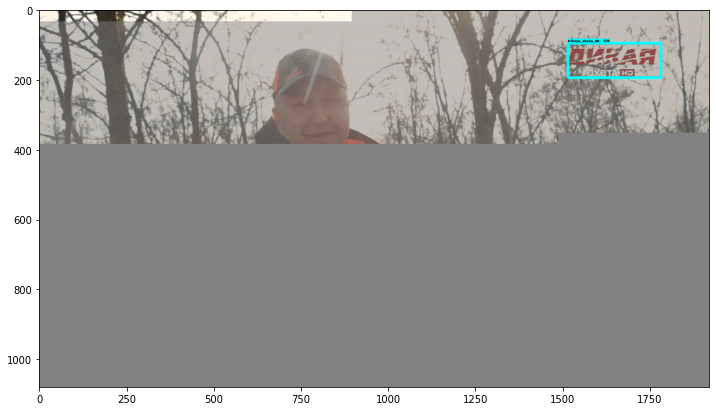

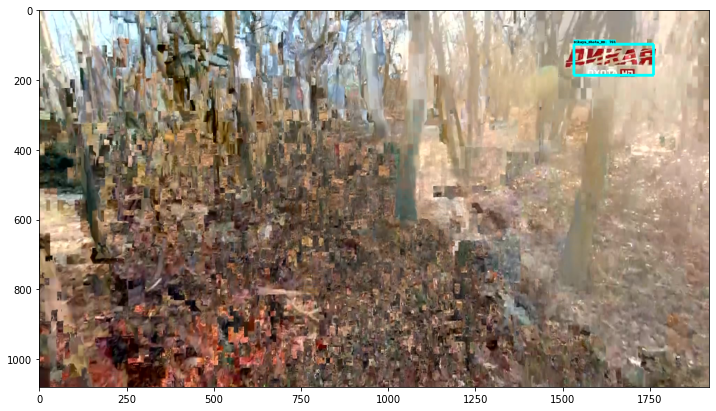

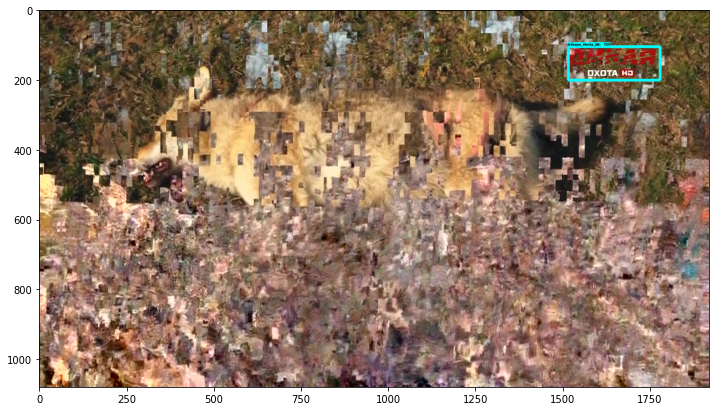

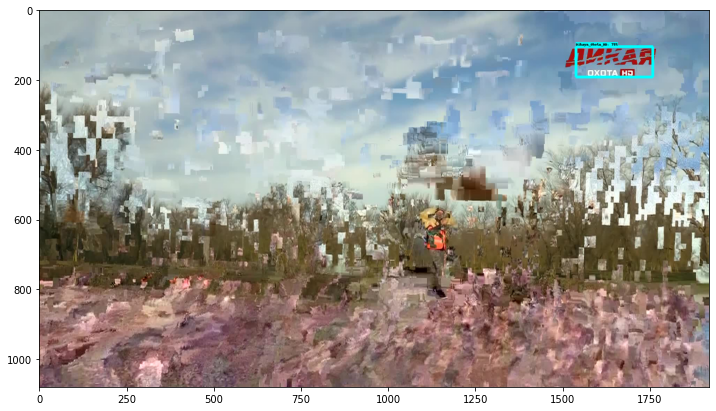

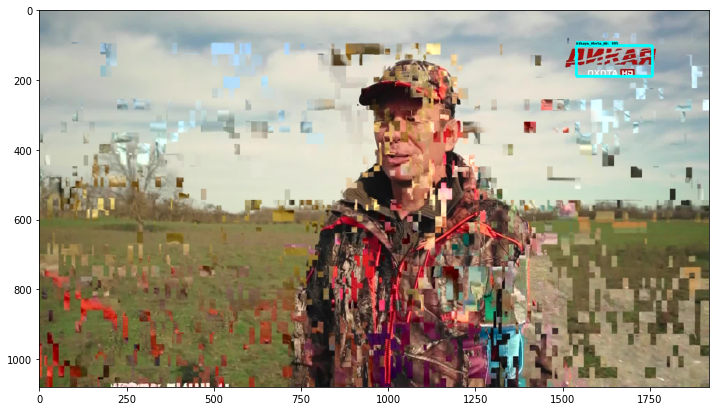

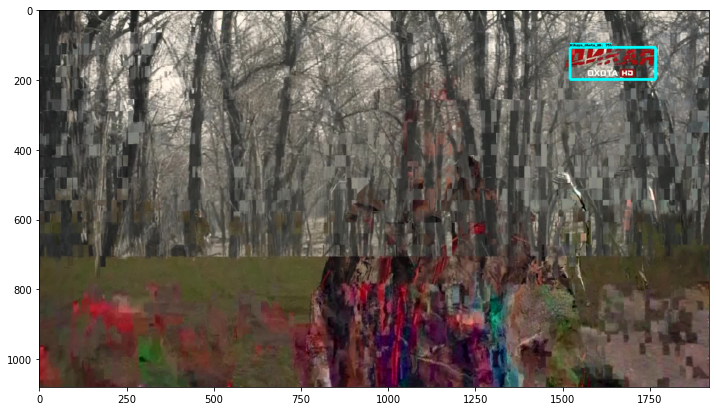

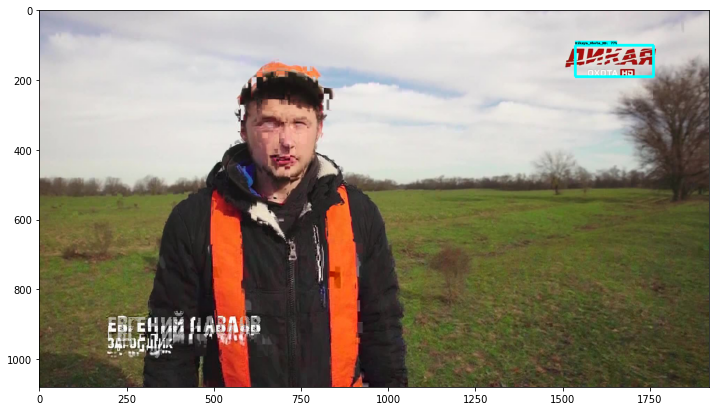

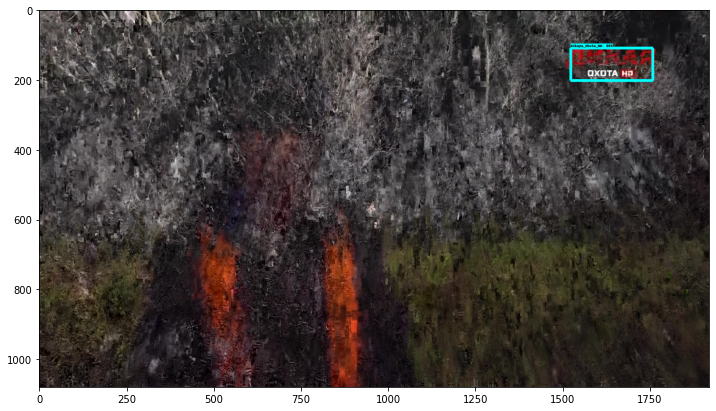

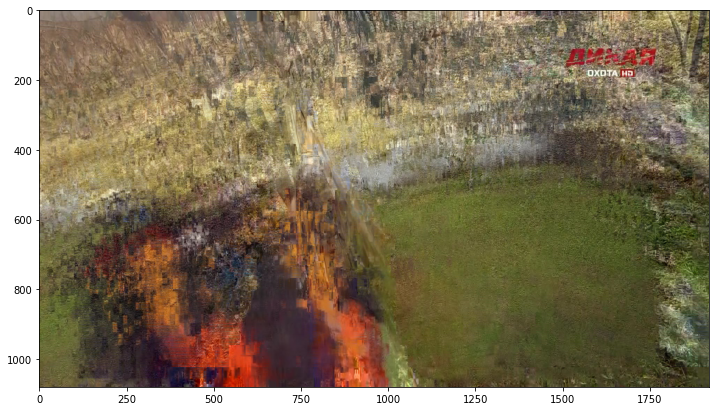

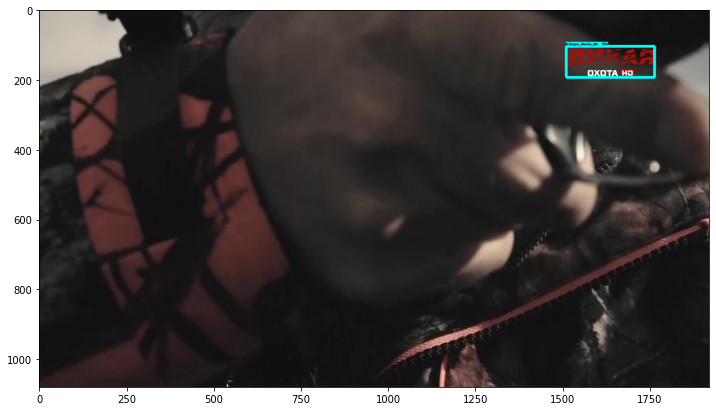

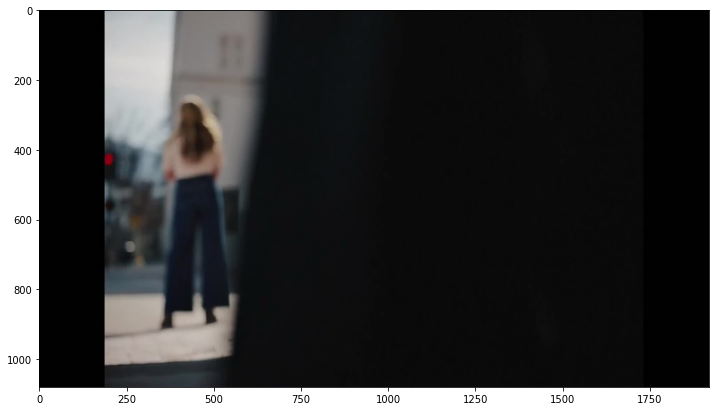

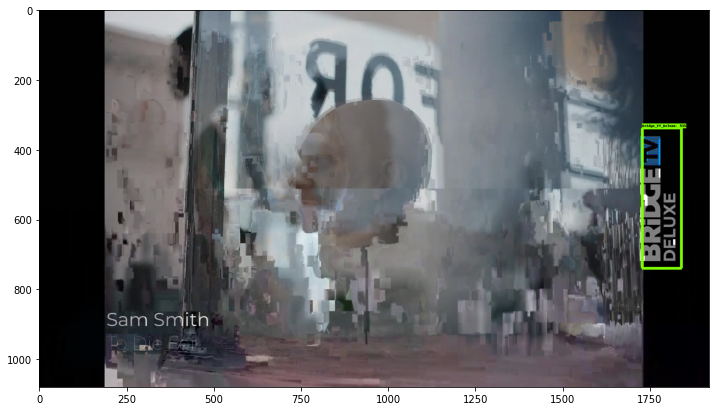

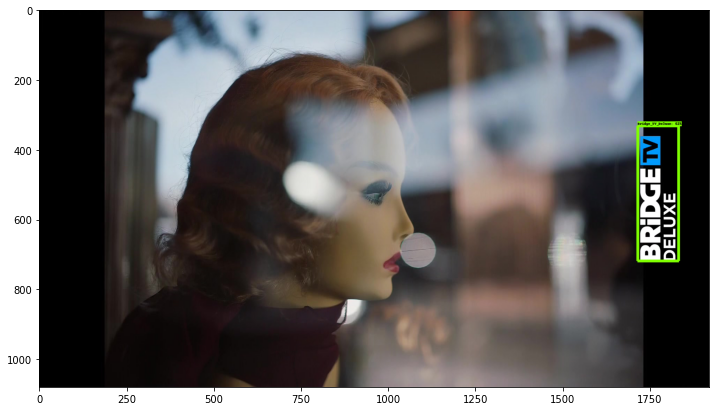

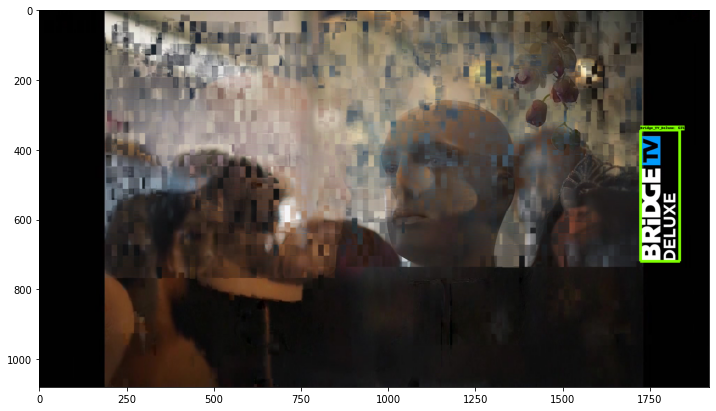

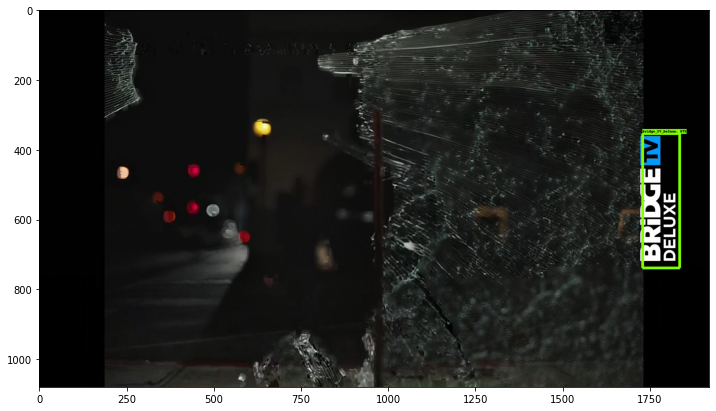

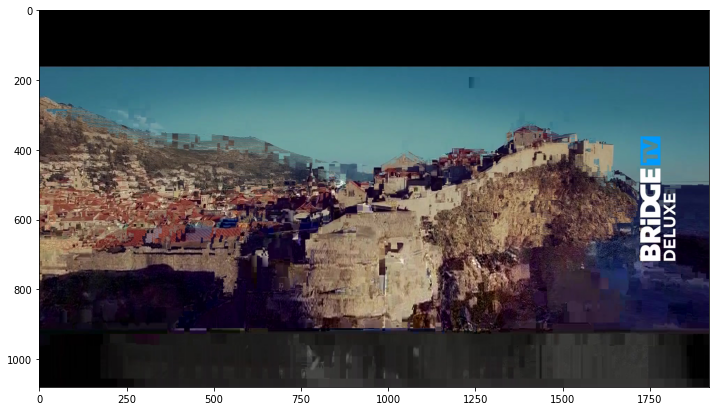

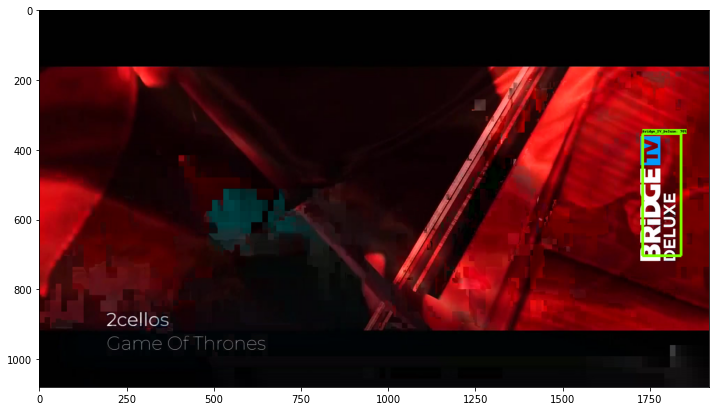

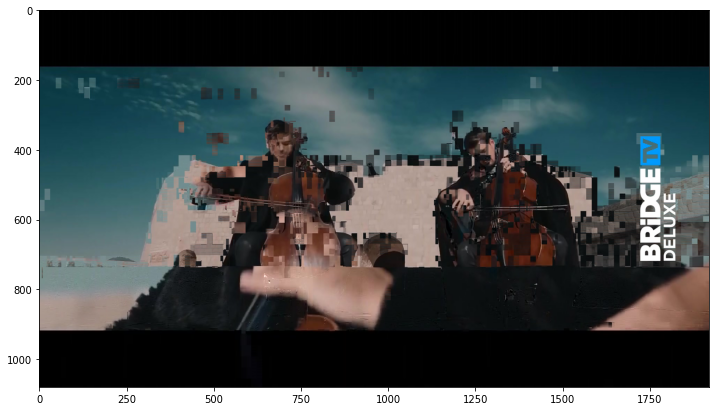

In [31]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)